# Математика для всех

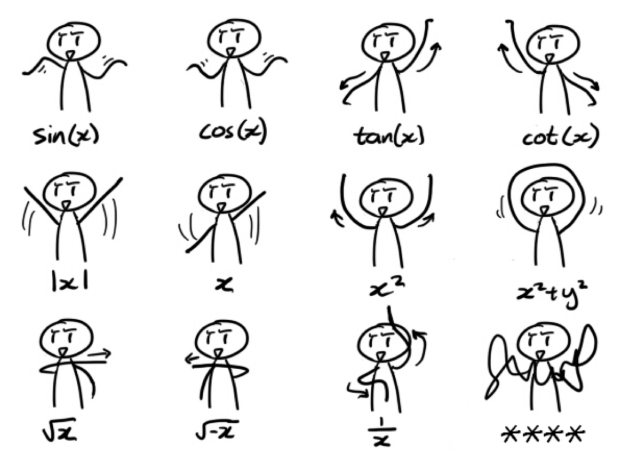

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Основы Numpy

Numpy предоставляет набор основных математических функций:

#### Найти, используя Numpy
1. $\big(\log(2.5) * \cos(3.5) - \sin(55)\big)^2$<br><br>
2. $\sqrt{11^{12} - 356^2}$<br><br>

#### Подсказка: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html

In [2]:
# Ваш код

# 2. Матрицы, векторы и прочие слоны

Африка, ЮАР.  
Вы - паразит на теле планеты и решили подзаработать охотой на слонов ( хотя кто может вас судить? вам же семью кормить ).  

Как у любого уважающего себя охотника у вас очень мало свободного времени, поэтому вы решили написать скрипт, который будет высчитывать, за сколько вы сможете продать убитых вами слонов. 
  
Торговцы слонами оценивают слонов по их весу, длине бивней, ширине стопы и длине хвоста. Благо рынок хорошо регулируется африканской мафией и цены у всех продавцов одинаковые. 

In [3]:
# Вот данные о слонах, которых вы вероломно подкараулили на водопое
# Представим их просто в виду таблички - строчками будут слоны, первая колонка - вес, вторая - длина рогов
# Прям как эксель

elephants = [
    [1, 1.23, 40, 123],
    [1.5, 0.9, 50, 45],
    [2, 1.8, 30, 96],
    [1.9, 2.5, 60, 30]
]

# А это - последняя информация о ценах одной тонны слонятины и одного метра рогов

prices = [3000, 4000, 1000, 2000]

In [ ]:
# Напишите функцию, которая будет считать цену одного слона

def get_price( elephant, current_prices ):
    final_price = #code
    return final_price

# Теперь выведите, сколько вы получите за каждого слона

#code

Как видите, код получается достаточно громоздким. И вообще - нельзя ли как-то формализовать все эти операции?  
Глупый вопрос - конечно можно. Зачем бы я иначе писал эту гнилую подводку, как на детсадовских олимпиадах.

### 2.1. Векторы

Вектор - упорядоченный набор чисел.<br>
Чуть более сложно:<br>
Вектор - точка в n-мерном  пространстве (упорядоченный набор координат).<br><br>
$\vec{x} = (x_1, x_2, ..., x_n)$<br><br>

В numpy векторы представляются в виде структуры np.array:

In [5]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

Все функции из предыдущего пункта так же работают и с векторами, поэлементно:

In [6]:
np.sqrt(vector)

array([1.        , 1.41421356, 1.73205081, 2.        ])

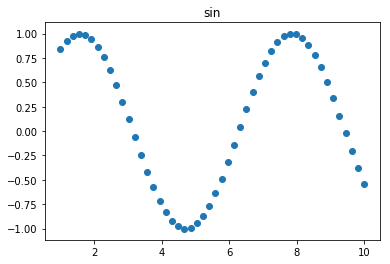

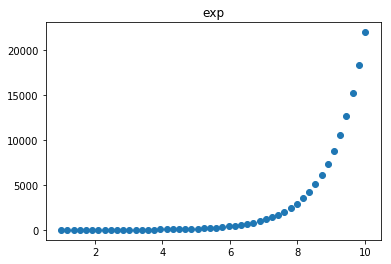

In [7]:
points = np.linspace(1, 10, 50)
for func in [np.sin, np.exp]:
    plt.figure()
    plt.title(func.__name__)
    plt.scatter(points, func(points))

Как и обычные векторы, их можно складывать, вычитать, делить и умножать поэлементно:

In [8]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 2])

In [9]:
x + y

array([4, 4, 5])

In [10]:
x - y

array([-2,  0,  1])

In [11]:
x * y

array([3, 4, 6])

In [12]:
x / y

array([0.33333333, 1.        , 1.5       ])

### Получить через операции над np.array:
1. $\vec{v} = (\sqrt1, \sqrt2, \sqrt3, ..., \sqrt{120})$<br>
2. $\vec{u} = (2^3, 2^3, 2^3, 2^3, ...., 2^3)$ (120 раз)<br>
3. $\vec{t} = (5^5 + 3^4, 2^5 + 2^4, 3^5 + 7^4)$<br>
4. $k = \big|\sum_{i=1}^{25}i^3\big| $<br><br>

#### Подсказка:
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html#routines-array-creation

In [13]:
# Ваш код

### Скалярное произведение векторов

Часто бывает нужным найти поэлементное (скалярное, внутреннее, dot product) произведение:<br>
$x \cdot y = x_1 \cdot y_1 + x_2 \cdot y_2 + ... + x_n \cdot y_n = \sum_{i=1}^n x_i \cdot y_i$

##### Важно понимать разницу!
Скалярное произведение: $x \cdot y = \sum_{i=1}^n x_i \cdot y_i$ - результат __число__ (скаляр).<br>
Поэлементное произведение: $x * y = (x_1 \cdot y_1, x_2 \cdot y_2, ..., x_n \cdot y_n)$ - результат __вектор__.<br>


Как вы понимаете - каждый наш слон является вектором. И цены тоже вектор (только из другого пространства).  
Операции, которые вы проводили при подсчёте цены одного слона эквивалентны скалярному произведению двух векторов.

In [14]:
# Вот как можно посчитать цену в одну строчку!

small_elephant = np.array([ 1.9, 2.5, 60, 30])
prices = np.array([3000, 4000, 1000, 2000])

small_elephant.dot(prices)

135700.0

## 2.2. Матрицы:

Давайте наконец добьем нашу задачу про слонов. Вот ещё партия убитых вами зверей.

$a = [0.5, 4.2, 0.3, 0.8]$<br>
$b = [1, 0, 0.6, 0.5]$<br>
$c = [1.5, 0.1, 0.5, 0.3]$<br>

Мы можем по очереди умножать их на вектор цен $w$, и смотреть на полученные стоимости.<br>
Но что, если мы рассматриваем очень много вариантов? 100? 100000?

Хочется как-то компактно записывать и быстро считать это.

На помощь приходят матрицы. Матрица - просто таблица чисел.<br>
В нашем случае - запишем векторы наших походов в магазин по строкам друг за другом:

$A = 
\begin{bmatrix}
    0.5       & 4.2 & 0.3 & 0.8 \\
    1       & 0 & 0.6 & 0.5 \\
    1.5       & 0.1 & 0.5 & 0.3
\end{bmatrix}
$
<br><br>
(договоримся, что матрицы обозначаются заглавными латинскими буквами)
<br><br>
Запишем вектор цен в столбик:<br><br>
$
w = 
\begin{bmatrix}
    36\\
    25\\
    65\\ 
    60\\
\end{bmatrix}
$

Теперь, мы можем рассчитать одновременно стоимости всех слонов за "1 действие":<br>
$ S = Aw = 
\begin{bmatrix}
    0.5       & 4.2 & 0.3 & 0.8 \\
    1       & 0 & 0.6 & 0.5 \\
    1.5       & 0.1 & 0.5 & 0.3
\end{bmatrix}
\cdot 
\begin{bmatrix}
    36\\
    25\\
    65\\ 
    50\\
\end{bmatrix}
= 
\begin{bmatrix}
    182.5\\
    100\\
    104\\
\end{bmatrix}
$

Это называется (_матричным_) __произведением матрицы на вектор__.

Вспомним скалярное произведение:
$x \cdot y = x_1 \cdot y_1 + x_2 \cdot y_2 + ... + x_n \cdot y_n = \sum_{i=1}^n x_i \cdot y_i$<br>
Заметим, что его можно представить как произведение матрицы на вектор, только матрица в данном случае состоит из 1 строки:

$x \cdot y =
\begin{bmatrix}
    x_1 & x_2 & \dots & x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
    y_1\\
    y_2\\
    \dots\\ 
    y_n\\
\end{bmatrix}
= x_1 \cdot y_1 + x_2 \cdot y_2 + ... + x_n \cdot y_n = \sum_{i=1}^n x_i \cdot y_i
$

Это матричное произведение вектора-строки на вектор-столбец, и записывается как $x^T y$.<br>
По умолчанию, все векторы - столбцы, чтобы получить строку, нужно вектор __транспонировать__ ("повернуть").

### Как это выглядит в коде?

Матричное произведение в Numpy реализовано через метод .dot() и функцию np.dot()

In [15]:
a = np.array([0.5, 4.2, 0.3, 0.8])
b = np.array([1, 0, 0.6, 0.5])
c = np.array([1.5, 0.1, 0.5, 0.3])
w =  np.array([36, 25, 65, 60])

In [16]:
a # Наш вектор

array([0.5, 4.2, 0.3, 0.8])

In [17]:
a * w # Не то, что мы хотим

array([ 18. , 105. ,  19.5,  48. ])

In [18]:
a.dot(w) # Хорошо (скалярное произведение)

190.5

In [19]:
A = np.array([a, b, c]) # Сделаем матрицу А
A

array([[0.5, 4.2, 0.3, 0.8],
       [1. , 0. , 0.6, 0.5],
       [1.5, 0.1, 0.5, 0.3]])

In [20]:
A.dot(w) # Eeeeee, матричное произведение

array([190.5, 105. , 107. ])

# 3. Регрессия, оптимизация и незнакомый город

Вам надоело торговать слонами в Африке ( это всё равно, что торговать льдом в Антарктиде ) - поэтому вы решили попробовать продать своих слонов в России.  
Однако русская мафия контролирует рынок куда слабее, поэтому у продавцов здесь бывают очень разные цены и так просто высчитать стоимость своих слонов у вас не выйдет.  
Но это не страшно, ваш друг подкинул вам данные о том, за сколько продавались разные слоны в последний месяц - давайте же прикинем цену нашей добычи, рассмотрев кейс, как задачу регрессии.  

Алгоритм будет такой:
1. Прикинем цену
2. Посчитаем, на сколько мы ошиблись на известных слонах
3. Изменим предполагаемые цены, чтобы уменьшить ошибку
4. Повторяем, пока не получим хорошую точность

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
plt.rcParams['figure.figsize'] = (13, 10)

In [23]:
# В России почему-то смотрят только на вес слона => каждый слон это одномерный вектор

old_elephants_x = np.array([1.8078836541228696, 3.3804565220047813, 2.4054504993411117, 2.790115394133025, 1.2885165028293863, 0.2498967519169346, 1.9449505604905892, 2.5075478456426, 2.3785221875445686, 1.8118093035523046, 1.5838197807747838, 3.45225570582625, 1.884318062035244, 1.877886447640214, 2.889389055814171])
old_elephants_y = np.array([17491.837086101525, 31765.256559475405, 23377.598087625644, 26828.2340326876, 18319.097725269807, 4702.413675674383, 20940.58202321062, 24240.549081455214, 20310.008154496343, 17456.59510493908, 16466.386531327447, 32324.216683775547, 17301.848163444418, 19112.382761129596, 26590.641532179598])

# Сделаем первую прикидку цены за килограмм

price = 13000

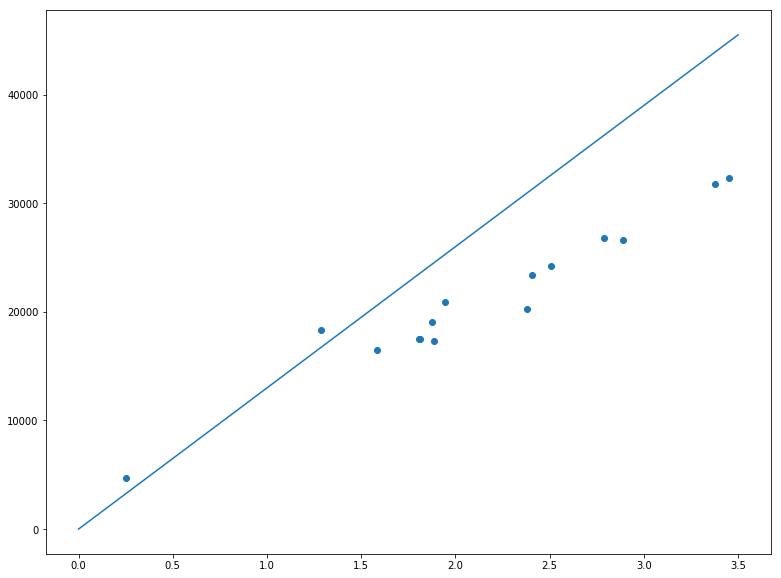

In [24]:
plt.scatter(old_elephants_x, old_elephants_y)

xs = np.linspace(0, 3.5)

plt.plot(xs, xs * price)

Теперь давайте поймём, на сколько мы ошиблись.  
Функция которая описывает, на сколько ошибается наш алгоритм называется функция ошибки (loss function) - в данном случае мы будем использовать MSE.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (pred_i - y_i)^2$,<br>
где $n$ - количество объектов в выборке, $pred_i$ - предсказание на i-м объекте, $y_i$ - истинный ответ на i-м объекте.

In [25]:
def mse(pred, y):
    return # code

In [26]:
mse(old_elephants_x * price, old_elephants_y)

# Если взять квадратный корень из этого, то мы получим среднее отклонение настоящих данных от предсказания.

63592050.683586024

Теперь посмотрим, как выглядит график зависимости ошибки от предполагаемой цены.

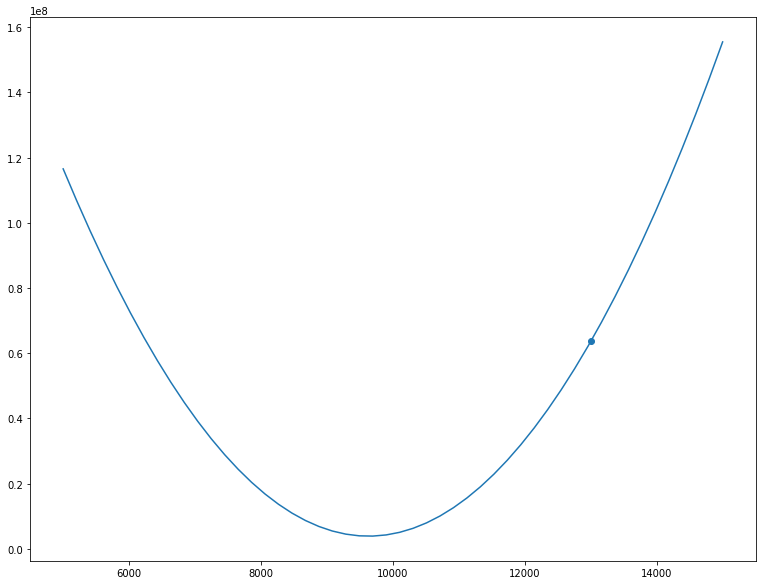

In [27]:
ws = np.linspace(5000, 15000)
errors = np.array([mse(old_elephants_x*w, old_elephants_y) for w in ws])

plt.plot(ws, errors)
plt.scatter([price], mse(old_elephants_x*price, old_elephants_y)) # наша первая догадка

Логично, что при цене максимально приближенной к реальной мы получим минимальное значение ошбки => правильная цена лежит где-то рядом с 9000$ за кг!  
  
Получается, мы можем оценивать параметры модели, решая задачу оптимизации функции.

Сейчас мы нашли минимум функции ошибки, просто посчитав её значение на большом диапазоне параметров. Можно ли сделать это эффективнее?  
В данном случае наши слоны были одномерными, однако ничего не мешает нам рассматривать их в n-мерном простанстве - как находить минимумы функции в многомерных пространствах?   
Столько вопросов.

# 4. Игрушечный градиентный спуск

Для нахождения минимума функции мы будем использовать градиентный спуск (однако начнём мы с одномерного случая, чтобы было наглядно).

Основная идея градиентного спуска максимально проста - берём конкретное значение параметра функции (в данном случае цены), смотрим, в какую сторону и как быстро убывает функция и шагаем в эту сторону на шаг, пропорциональный скорости убывания!

![grad_desc](https://miro.medium.com/max/1200/1*_6TVU8yGpXNYDkkpOfnJ6Q.png)

## 4.1. Производная

Для начала нам нужно научиться описывать скорость роста функции в точке, для этого введём понятие производной.  
Проще всего это сделать, объяснив её физический смысл.

Теперь постройте график производной вот такой функции:

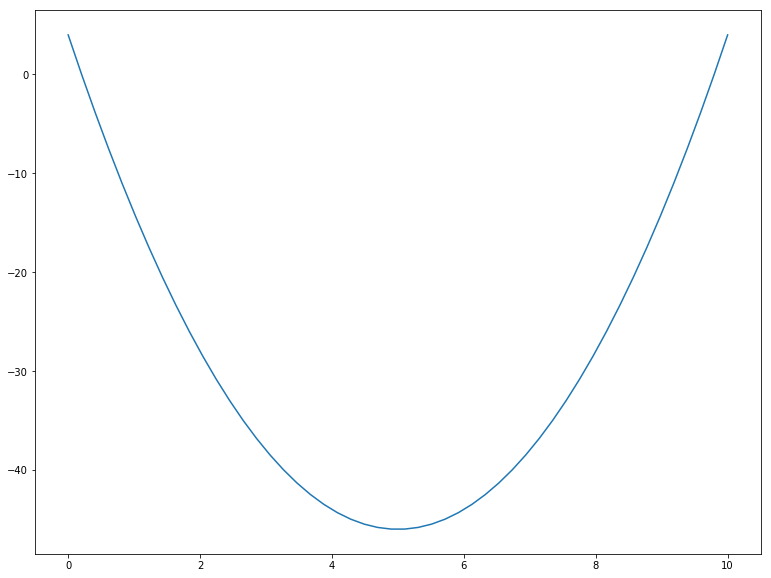

In [59]:
def f(x):
    return 2*x**2 - 20*x + 4

def plot(f, min_x=0, max_x=10):
    xs = np.linspace(min_x, max_x)
    ys = np.array(list(map(f, xs)))

    plt.plot(xs, ys)

plot(f)

In [ ]:
def der(x):
    return # code

plot(der)

Помните:  
    - Отрицательная производная == функция убывает  
    - Положительная производная == функция растёт  
    - Нулевая проивзодная == локальный минимум

## 4.2. Градиентный спуск 

Реализуйте одномерный градиентный спуск и посмотрите, как он выполняется.

In [40]:
from IPython.display import display, clear_output

def plot_step(x, f, der, steps, min_x=0, max_x=10):
        
    xs = np.linspace(min_x, max_x)
    func_y = np.array(list(map(f, xs)))
    func_der = np.array(list(map(der, xs)))
    
    ax[0].plot(xs, func_y)
    ax[1].plot(xs, func_der)
        
    steps.append([x, f(x)])
    
    ax[0].scatter([p[0] for p in steps], [p[1] for p in steps])
    ax[1].scatter([x], [der(x)])
    
    b = f(x) - der(x)*x
    ax[0].plot(np.linspace(x-1, x+1), np.linspace(x-1, x+1) * der(x) + b)

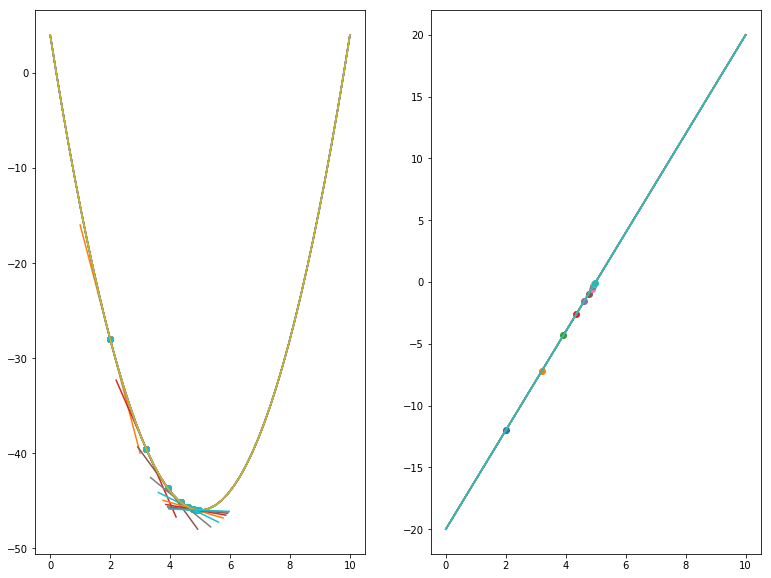

Current derivative:  -0.07255941120000031


In [43]:
steps = []

LEARNING_RATE = 0.1 # learning rate определяет велечину шагу, который мы делаем по функции
MAX_STEPS = 10

curr_x = 2

fig = plt.figure()
ax = fig.subplots(1,2)

for i in range(MAX_STEPS):
    
    plot_step(curr_x, f, der, steps)
    
    curr_der = der(curr_x)
    
    curr_x = # code 
    
    display(fig)
    
    print('Current derivative: ', der(curr_x))

    clear_output(wait=True)
    plt.pause(2)

Попробуйте применить градиентный спуск для получения цены на слоновье мясо.

# 5. Многомерный случай 

Отлично, мы разобрались с одномерным случаем, теперь надо просто сделать пару технических финтов и мы уже многомерны.

## 5.1. Градиент

Рассмотрим функцию, заданную на двумерном пространстве.  
В одномерном случае производная указывала нам, в каком направлении нам нужно сместить аргумент, чтобы значение функции увеличилось - давайте обобщим это на двумерный случай.

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
X,Y = np.mgrid[-2:2:0.2, -2:2:0.2]

In [50]:
def double_f(x, y):
    return x**2 + y**2

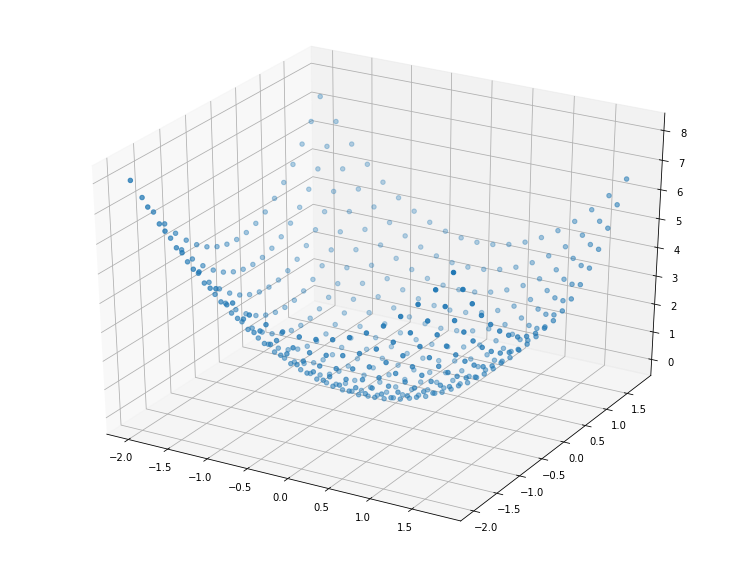

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X,Y = np.mgrid[-2:2:0.2, -2:2:0.2]

ax.scatter(X.reshape(-1), Y.reshape(-1), list(map(lambda x: double_f(x[0], x[1]), zip(X, Y))))

Для начала зафиксируем координату y и возьмём производную по x - мы получили скорость роста функции по x.  
Производная по одной из переменных называется <b>частная производная</b>. (при взятии частной производной мы просто считаем все остальные переменные константой)  
$$\frac{\delta f}{\delta x} = 2x$$

Теперь мы можем выразить прирост функции в конкретной точке через прирост x'а (пока считаем, что изменяется только x).
$$df_x = \frac{\delta f}{\delta x} * dx$$

Если рассматривать очень маленькие изменения аргументов функции - изменение её значения можно представить, как сумму изменений по переменным. $$df = df_x + df_y$$
Распишем:
$$df = \frac{\delta f}{\delta x} * dx + \frac{\delta f}{\delta y} * dy$$
Или можно записать это в векторном виде:
$$df = \vec{grad(f)} * \vec{dx}$$
Где $\vec{dx}$ - вектор изменения аргумента, $\vec{grad(f)}$ - вектор частных производных, или по другому <b>градиент.</b>

In [58]:
# Посмотрите, как будет выглядеть градиент для нашей функции.

Градиент - отличная штука. Он показывает направление наибольшего роста функции ( а если вы возьмёте его проекцию на какую-нибудь ось, то получите скорость роста функции по этому направлению - так если спроецировать его на Ox у вас получится просто частная производная $\frac{\delta f}{\delta x}$)
![gradient](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Gradient_of_a_Function.tif/lossy-page1-802px-Gradient_of_a_Function.tif.jpg)

Используя понятие градиента, не трудно обобщить градиентный спуск на многомерные пространства - теперь для каждой переменной координата градиента указывает, в каком направлении нужно её сместить, чтобы стать ближе к локальному минимуму.

#### Теперь пора бросить слонов и перейти к реальной многомерной задаче